In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import DescrStatsW
from itertools import combinations
import statsmodels.formula.api as smf

##### Data loading

In [ ]:
maxchair = pd.read_csv("maxchair.csv")
maxwalk = pd.read_csv("maxwalk.csv")
maxchair.shape, maxwalk.shape

((9753, 11), (1331, 11))

In [67]:
maxchair.columns, maxwalk.columns

(Index(['mergeid', 'age', 'bmi', 'female', 'educational_level', 'OA_conserv',
        'Hypertension', 'Diabetes', 'maxgrip', 'chair', 'disease_category'],
       dtype='object'),
 Index(['mergeid', 'age', 'bmi', 'female', 'educational_level', 'OA_conserv',
        'Hypertension', 'Diabetes', 'maxgrip', 'walking', 'disease_category'],
       dtype='object'))

### For paper:

##### Regression maxgrip min under 75 and uper 75(in the paper Fig2)

In [102]:
maxchair.shape, maxwalk.shape

((9753, 12), (1331, 12))

In [ ]:

def plot_grip_strength_regression(maxchair, maxwalk):

    model1 = smf.ols('maxgrip ~ C(disease_category) + age + bmi + female + educational_level', data=maxchair).fit()
    df1 = pd.DataFrame({
        'predictor': model1.params.index,
        'coef': model1.params.values,
        'ci_lower': model1.conf_int().iloc[:, 0],
        'ci_upper': model1.conf_int().iloc[:, 1],
        'Outcome': 'Grip Strength (<75)'
    })


    model2 = smf.ols('maxgrip ~ C(disease_category) + age + bmi + female + educational_level', data=maxwalk).fit()
    df2 = pd.DataFrame({
        'predictor': model2.params.index,
        'coef': model2.params.values,
        'ci_lower': model2.conf_int().iloc[:, 0],
        'ci_upper': model2.conf_int().iloc[:, 1],
        'Outcome': 'Grip Strength (≥75)'
    })

 
    all_df = pd.concat([df1, df2])
    all_df = all_df[~all_df['predictor'].isin(['Intercept', 'age', 'bmi', 'female', 'educational_level'])]
    all_df['predictor'] = all_df['predictor'].str.replace(r'C\(disease_category\)\[T\.', '', regex=True).str.rstrip(']')
    all_df['predictor'] = all_df['predictor'].astype(str)

    all_df['Outcome'] = all_df['Outcome'].replace({
    'Grip Strength (<75)': 'Grip Strength (<75 years)',
    'Grip Strength (≥75)': 'Grip Strength (≥75 years)'
})


    palette = {
        'Grip Strength (<75 years)': '#1f77b4',
        'Grip Strength (≥75 years)': '#d62728'
    }



    plt.figure(figsize=(10, 6))
    sns.pointplot(
        data=all_df, x='coef', y='predictor', hue='Outcome',
        palette=palette, dodge=0.5, join=False, markers='o'
    )

    for _, row in all_df.iterrows():
        color = palette[row['Outcome']]
        plt.plot([row['ci_lower'], row['ci_upper']], [row['predictor'], row['predictor']],
                 color=color, linewidth=2, alpha=0.7)

    plt.axvline(0, color='red', linestyle='--')
    plt.title("Adjusted Regression Coefficients for Grip Strength by Disease Group")
    plt.xlabel("Coefficient Estimate")
    plt.ylabel("Disease Groups")
    plt.legend(title="Outcome")
    plt.tight_layout()
    plt.show()
    
    return all_df



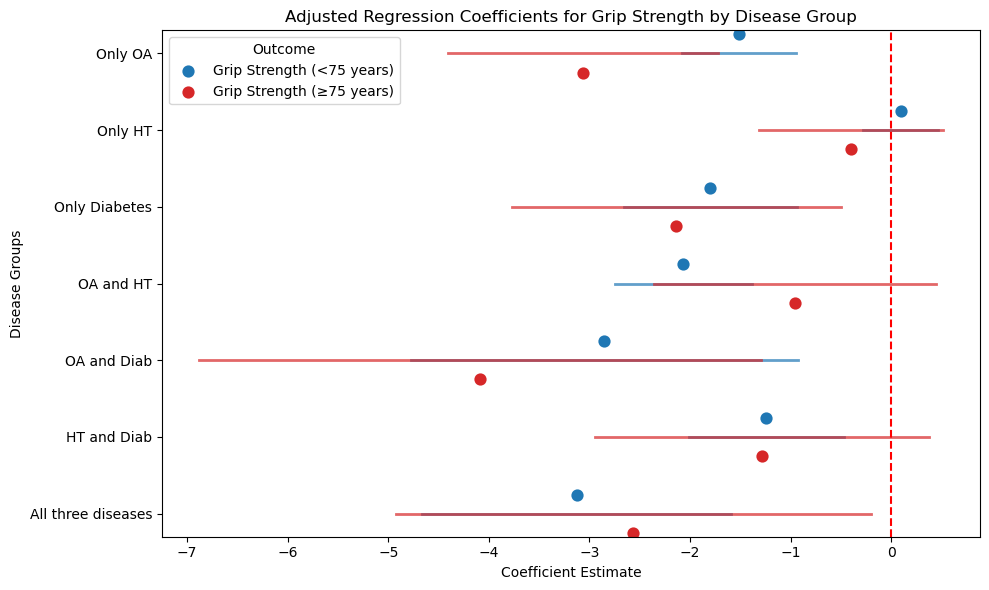

                                                    predictor      coef  \
C(disease_category)[T.Only OA]                        Only OA -1.508588   
C(disease_category)[T.Only HT]                        Only HT  0.094444   
C(disease_category)[T.Only Diabetes]            Only Diabetes -1.798717   
C(disease_category)[T.OA and HT]                    OA and HT -2.064605   
C(disease_category)[T.OA and Diab]                OA and Diab -2.851977   
C(disease_category)[T.HT and Diab]                HT and Diab -1.242787   
C(disease_category)[T.All three diseases]  All three diseases -3.128064   
C(disease_category)[T.Only OA]                        Only OA -3.061049   
C(disease_category)[T.Only HT]                        Only HT -0.398940   
C(disease_category)[T.Only Diabetes]            Only Diabetes -2.137314   
C(disease_category)[T.OA and HT]                    OA and HT -0.954418   
C(disease_category)[T.OA and Diab]                OA and Diab -4.090537   
C(disease_category)[T.HT 

In [104]:
df = plot_grip_strength_regression(maxchair, maxwalk)
print(df)


##### Regression maxchair maxwalk (in the paper Fig3)

In [ ]:
def plot_mobility_regression_coeffs_fixed(maxchair, maxwalk):
 
    model_chair = smf.ols('chair ~ C(disease_category) + age + bmi + female + educational_level', data=maxchair).fit()
    model_walk = smf.ols('walking ~ C(disease_category) + age + bmi + female + educational_level', data=maxwalk).fit()

    df_chair = pd.DataFrame({
        'predictor': model_chair.params.index,
        'coef': model_chair.params.values,
        'ci_lower': model_chair.conf_int().iloc[:, 0],
        'ci_upper': model_chair.conf_int().iloc[:, 1],
        'Outcome': 'Chair Stand (<75)' 
    })

    df_walk = pd.DataFrame({
        'predictor': model_walk.params.index,
        'coef': model_walk.params.values,
        'ci_lower': model_walk.conf_int().iloc[:, 0],
        'ci_upper': model_walk.conf_int().iloc[:, 1],
        'Outcome': 'Walking Speed (≥75)'  
    })

    results = pd.concat([df_chair, df_walk])
    results = results[~results['predictor'].isin(['Intercept', 'age', 'bmi', 'female', 'educational_level'])]
    results['predictor'] = results['predictor'].str.replace(r'C\(disease_category\)\[T\.', '', regex=True).str.rstrip(']')


    results['Outcome'] = results['Outcome'].replace({
        'Chair Stand (<75)': 'Chair Stand (<75 years)',
        'Walking Speed (≥75)': 'Walking Speed (≥75 years)'
    })


    palette = {
        'Chair Stand (<75 years)': '#1f77b4',       
        'Walking Speed (≥75 years)': '#d62728',    
    }



    plt.figure(figsize=(10, 6))
    sns.pointplot(
        data=results,
        x='coef',
        y='predictor',
        hue='Outcome',
        palette=palette,
        dodge=0.5,
        join=False
    )

    for i, row in results.iterrows():
        plt.plot(
            [row['ci_lower'], row['ci_upper']],
            [row['predictor'], row['predictor']],
            color=palette[row['Outcome']],
            linewidth=1.5,
            alpha=0.8
        )

    plt.axvline(0, color='black', linestyle='--')
    plt.title("Adjusted Regression Coefficients for Mobility Outcomes by Disease Group")
    plt.xlabel("Coefficient Estimate")
    plt.ylabel("Disease Groups")
    plt.legend(title="Outcome")
    plt.tight_layout()
    plt.show()
    
    return results


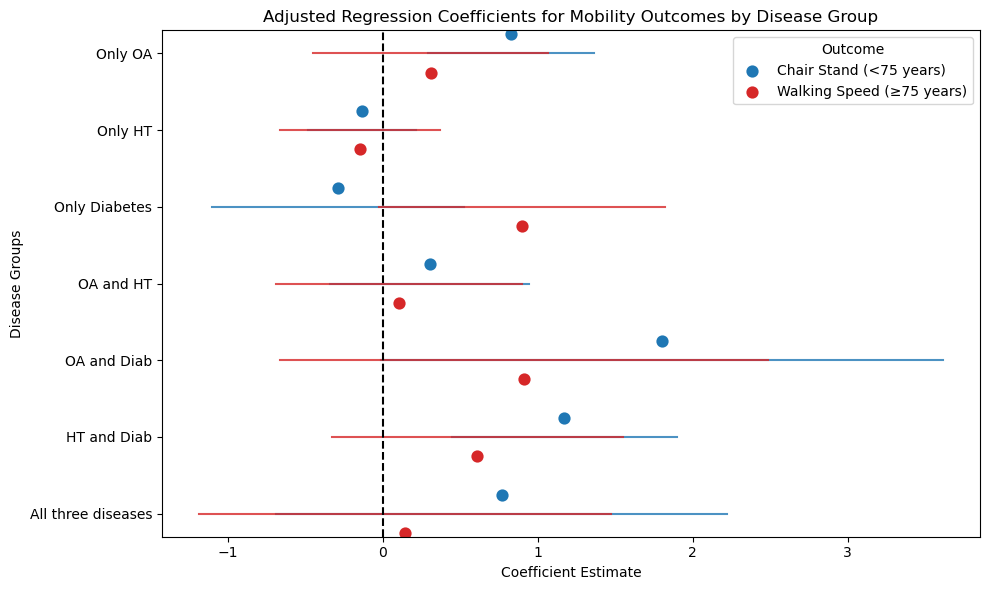

                                                    predictor      coef  \
C(disease_category)[T.Only OA]                        Only OA  0.824936   
C(disease_category)[T.Only HT]                        Only HT -0.133282   
C(disease_category)[T.Only Diabetes]            Only Diabetes -0.287817   
C(disease_category)[T.OA and HT]                    OA and HT  0.301740   
C(disease_category)[T.OA and Diab]                OA and Diab  1.799025   
C(disease_category)[T.HT and Diab]                HT and Diab  1.169918   
C(disease_category)[T.All three diseases]  All three diseases  0.766489   
C(disease_category)[T.Only OA]                        Only OA  0.308107   
C(disease_category)[T.Only HT]                        Only HT -0.146428   
C(disease_category)[T.Only Diabetes]            Only Diabetes  0.895428   
C(disease_category)[T.OA and HT]                    OA and HT  0.102881   
C(disease_category)[T.OA and Diab]                OA and Diab  0.909602   
C(disease_category)[T.HT 

In [106]:
df_1 = plot_mobility_regression_coeffs_fixed(maxchair, maxwalk)
print(df_1)